
# Garbage Classification
###### **Code by Kiersten Johns**

### Imports:

In [ ]:
from google.colab import drive

# drive.mount('content/drive')

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

import cv2
import imghdr

### Read in data:

In [10]:
%cd /content/drive/MyDrive/Data Projects/GarbageClassification/data

/content/drive/MyDrive/Data Projects/GarbageClassification/data


In [11]:
%ls

battery/  biological/  cardboard/  clothes/  glass/  metal/  paper/  plastic/  shoes/  trash/


In [19]:
tf.keras.utils.image_dataset_from_directory??

#Can change batch and image size

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data Projects/GarbageClassification/data')

Found 24032 files belonging to 10 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

In [44]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [45]:
# images batch[0]
#image label
batch[1]

array([3, 8, 3, 5, 8, 2, 4, 8, 2, 4, 8, 4, 5, 4, 6, 6, 6, 2, 5, 3, 4, 4,
       3, 1, 3, 5, 7, 3, 5, 6, 2, 4], dtype=int32)

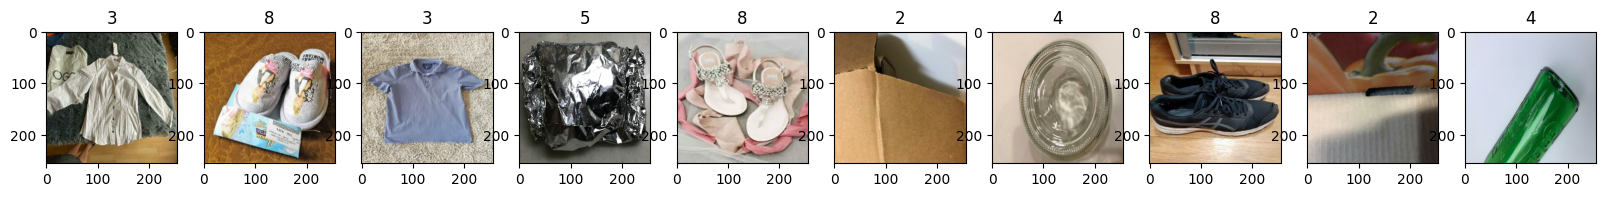

In [46]:
# Check which class number is assigned to which image type
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))

for idx, img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [47]:
# Get another batch
batch = data_iterator.next()

In [48]:
batch[1]

array([7, 2, 3, 8, 6, 4, 7, 2, 8, 2, 5, 3, 0, 8, 7, 1, 4, 3, 4, 0, 6, 3,
       6, 5, 4, 4, 4, 3, 6, 7, 2, 3], dtype=int32)

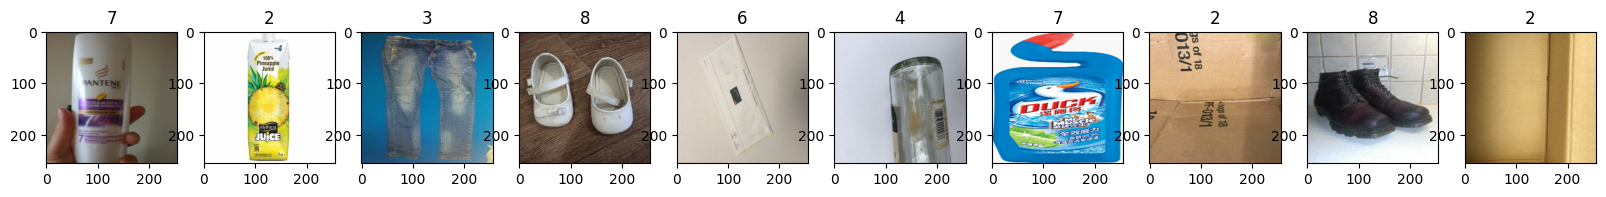

In [49]:
fig, ax = plt.subplots(ncols = 10, figsize = (20,20))

for idx, img in enumerate(batch[0][:10]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])



*   0 --> battery
*   1 --> biological
*   2 --> carboard
*   3 --> clothes
*   4 --> glass
*   5 --> metal
*   6 --> paper
*   7 --> plastic
*   8 --> shoes
*   9 --> trash

### Pre-process the data:

#### Scale the data:

In [51]:
batch[0].shape

(32, 256, 256, 3)

In [53]:
batch[0].min()

0.0

In [54]:
batch[0].max()

255.0

In [55]:
# to optimize, divide all by 255
scale = batch[0] / 255

In [56]:
scale.min()

0.0

In [58]:
# now all images are between the size of 0 to 1
scale.max()

1.0

In [59]:
# Now, apply this thinking to a data pipeline:

# x is images, y is labels
data = data.map(lambda x,y: (x/255, y))

In [62]:
data.as_numpy_iterator().next()[0].max()

1.0

#### Split the data:

In [63]:
len(data)

751

In [67]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [68]:
print(train_size)
print(val_size)
print(test_size)

525
150
76


In [69]:
train_size + val_size + test_size

751

In [70]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [71]:
print(len(train))
print(len(val))
print(len(test))

525
150
76


### Model Building:

In [73]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [74]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Fit the Model:

In [76]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
 83/525 [===>..........................] - ETA: 43:58 - loss: -19474896.0000 - accuracy: 0.0377

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_4]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1513]

In [ ]:
hist.history

### Plot Performance:

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'real', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.lengend(loc = "upper left")
plt.show()

### Evaluate Model

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy() }, Accuracy: {acc.result().numpy}'

In [ ]:
# Pick back up here...